In [48]:
import os
import cv2
from sklearn.feature_extraction import image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Chemins des dossiers d'entraînement et de test
train_dir = 'data/train'
test_dir = 'data/test'

# Création d'un générateur d'images
batch_size = 32
image_size = (150, 150)


In [1]:
# Exemple d'extraction de caractéristiques (vous pouvez utiliser d'autres descripteurs)
def extract_features(image):
    # Exemple : histogramme de couleurs
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist


In [32]:
# Charger les images et extraire les caractéristiques

def loadImage(path):
    X=[]
    y=[]
    for classe in ["car", "undefined"]:
        for filename in os.listdir(os.path.join(path, classe)):
            img_path = os.path.join(path, classe, filename)
            img = cv2.imread(img_path)
            if img is not None :
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_features = extract_features(img)
                X.append(img_features)
                y.append(1 if classe == "car" else 0)
    return X,y

X_train, y_train = loadImage(train_dir)
X_test, y_test = loadImage(test_dir)

In [34]:
len(X_train),len(y_train),len(X_test),len(y_test)

(149, 149, 40, 40)

In [42]:
X_train[0].shape, X_test[0].shape

((512,), (512,))

## SVM

In [73]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 0.95


## KNN

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_accuracy = knn_model.score(X_test, y_test)
print(f"KNN Accuracy: {knn_accuracy}")


KNN Accuracy: 0.9


## Random Forest

In [45]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.975


In [46]:
print(f"SVM Accuracy: {svm_accuracy}")
print(f"KNN Accuracy: {knn_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")


SVM Accuracy: 0.95
KNN Accuracy: 0.9
Random Forest Accuracy: 0.975


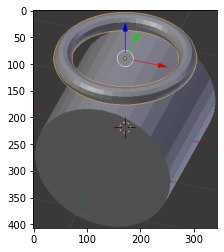

In [70]:
# Chemin de l'image de test
test_image_path = 'data/test/undefined/other object_83.png'

# Lire l'image avec OpenCV
test_image = cv2.imread(test_image_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)

In [71]:
test_features = extract_features(test_image)
test_features = np.reshape(test_features, (1, -1))

In [72]:
svm_prediction = svm_model.predict(test_features)
knn_prediction = knn_model.predict(test_features)
rf_prediction = rf_model.predict(test_features)

# Afficher les résultats des prédictions
if svm_prediction == 1:
    print("SVM : C'est une voiture")
else:
    print("SVM : Ce n'est pas une voiture")

if knn_prediction == 1:
    print("KNN : C'est une voiture")
else:
    print("KNN : Ce n'est pas une voiture")

if rf_prediction == 1:
    print("Random Forest : C'est une voiture")
else:
    print("Random Forest : Ce n'est pas une voiture")

SVM : Ce n'est pas une voiture
KNN : Ce n'est pas une voiture
Random Forest : Ce n'est pas une voiture
